# Problem 2: Multi-class Logistic Regression – Visualizing the Solution.

You will repeat
the previous problem but for the MNIST dataset which you will find here: https://www.openml.org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image
recognition problems in computer vision. We will see here how well logistic regression does, as you
did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and
that in connection to this, sparsity can be useful.

•Use the fetch openml command from sklearn.datasets to import the MNIST data set

In [ ]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot
import numpy as np

dataset, target = fetch_openml(name = 'mnist_784', as_frame = False, return_X_y= True)

•Choose a reasonable train-test split, and again run multi-class logistic regression on these
using the cross entropy loss, as you did above. Try to optimize the hyperparameters

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
dataset = trans.fit_transform(dataset) #normalize data to help with convergence

X_train, X_test, y_train, y_test = train_test_split(
    dataset, target, stratify=target, random_state=0, train_size=int(len(dataset)*6/7), test_size=int(len(dataset)/7))

# model = LogisticRegression(multi_class="multinomial", solver = "saga")
# grid_params = {'penalty': ['l1','l2', 'elasticnet'], 'C': [0.01,0.1,1]} #C use more granular values
# grid_search = GridSearchCV(estimator=model, param_grid=grid_params, scoring='accuracy', 
#                        cv=6)
# grid_search.fit(X_train,y_train)

# print("tuned hyperparameters : ",grid_search.best_params_)
# print("accuracy :",grid_search.best_score_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#more optimization attempts
model = LogisticRegression(multi_class="multinomial", solver = "saga", penalty = 'l2', max_iter = 1000, C = .895, n_jobs = -1)
# model_params = {'C': [float(x) for x in np.linspace(0.8, 1.0)], 'tol': [float(x) for x in np.linspace(1e-6, 1e-4)]} #C use more granular values
# random_search = RandomizedSearchCV(model, model_params, n_iter = 25, scoring='accuracy')
model.fit(X_train,y_train)

# print("tuned hyperparameters : ",random_search.best_params_)
print("accuracy :", model.score(X_train, y_train))

/Users/laithaustin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy : 0.9376166666666667


Results found from GridSearch for hyperparameters

tuned hyperparameters :  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9171833333333334

Results found from manual search + random search for hyperparameters

tuned hyperparameters :  "multi_class="multinomial", solver = "saga", penalty = 'l2', max_iter = 1000, C = .895"
accuracy : 0.9376333333333333

In [ ]:
from sklearn.metrics import log_loss
# predictions = tuned_model.predict(X_test)
predictions_prob = model.predict_proba(X_test)
print(log_loss(y_test, predictions_prob))
print(log_loss(y_train, model.predict_proba(X_train)))

0.2859308493055544
0.22525112343899228


Report your training and test loss from above

Test loss: 0.28590608635173237
Training loss: 0.2252494030005957

•Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.

In [ ]:
#hyperparameter tuning with manual inspection + randomCV
model2 = LogisticRegression(multi_class="multinomial", solver = "saga", penalty = 'l1', max_iter = 1000, C = 1.1, tol = 0.003)
model2.fit(X_train, y_train)

LogisticRegression(C=1.1, max_iter=1000, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.003)

In [ ]:
print("accuracy :", model2.score(X_train, y_train)) #0.9293333333333333 tol = .003 c= 1

accuracy : 0.9293333333333333


Accuracy of tuned_model vs l1 regularized logistic regression model:
0.9376333333333333 vs 0.9293833333333333
So this is pretty close overall.

•Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimension as the data. Therefore we can pretend that the coefficients of the solution are an image
of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to
the 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look
like the digits they are classifying.

In [ ]:
def img_gen(dataset, index):
    R = dataset[index][0:1024].reshape(28,28)/255.0 
 
    img = np.array(R)

    return img

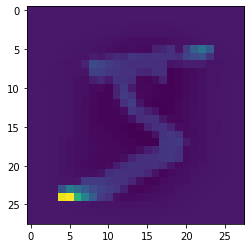

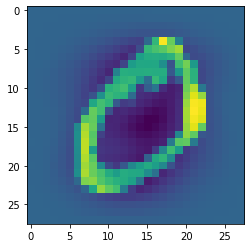

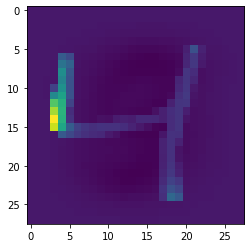

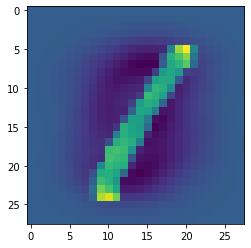

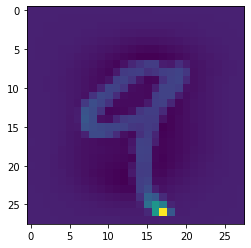

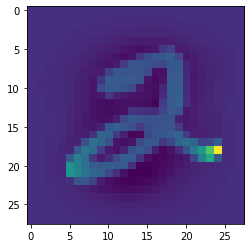

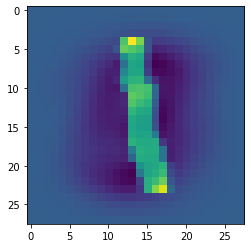

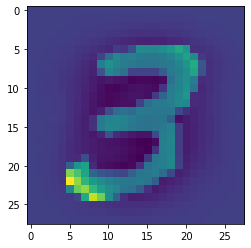

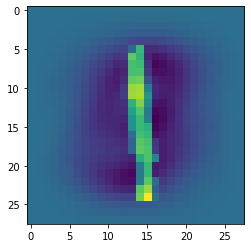

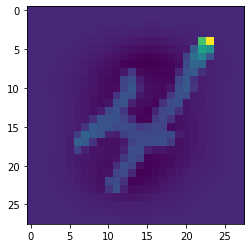

<Figure size 432x288 with 0 Axes>

In [ ]:
coefs = model2.coef_
indexes = [i for i in range(10)]
for index in indexes:
    img = img_gen(dataset, index)
    plt.imshow(img)
    plt.figure()

# Problem 3: Revisiting Logistic Regression and MNIST

Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
Validation to find the best settings. How well can you do? You should use the accuracy
metric to compare to logistic regression. What are the hyperparameters of your best model?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#find best hyperparams here
# forest_params = {'n_estimators': [int(x) for x in np.linspace(650, 750)], 'max_depth' : [int(x) for x in np.linspace(1,5,3)]}
forest_model = RandomForestClassifier(n_estimators = 709, max_depth = 25)
# random_search = RandomizedSearchCV(forest_model, forest_params, n_iter = 5,cv = 3, scoring='accuracy')
forest_model.fit(X_train, y_train)

print("accuracy :", forest_model.score(X_test, y_test)) #accuracy : 0.9726 estimators = 300

accuracy : 0.9719


In [ ]:
acc = cross_val_score(forest_model, dataset, target)
acc

array([0.97035714, 0.96871429, 0.967     , 0.96728571, 0.97371429])

In [ ]:
sum(acc)/len(acc) #0.9700857142857142 estimators = 700

0.9694142857142858

Best hyperparameters: n_estimators = 709, max_depth = 25
Best score: 0.9694142857142858
LR vs RF: RF was more accurate with 96.9% accuracy vs 93.7%

Use Gradient Boosting to do the same. Try your best to tune your hyper parameters. What
are the hyperparameters of your best model?

In [ ]:
from catboost import CatBoostClassifier

cat_params = {'eta': np.linspace(.1,1.5), 'max_depth': [int(x) for x in np.linspace(0,100,20)]}
cat_model = CatBoostClassifier()
# random_search = RandomizedSearchCV(cat_model, cat_params, n_iter = 5,cv = 3, scoring='accuracy')
cat_model.fit(X_train, y_train)

print("accuracy :", cat_model.score(X_test, y_test))

Learning rate set to 0.097501
0:	learn: 2.0134943	total: 728ms	remaining: 12m 7s
1:	learn: 1.8050677	total: 1.41s	remaining: 11m 45s
2:	learn: 1.6467857	total: 2.06s	remaining: 11m 23s
3:	learn: 1.5064763	total: 2.64s	remaining: 10m 56s
4:	learn: 1.3987126	total: 3.27s	remaining: 10m 50s
5:	learn: 1.3113756	total: 3.84s	remaining: 10m 36s
6:	learn: 1.2337832	total: 4.62s	remaining: 10m 55s
7:	learn: 1.1677378	total: 5.37s	remaining: 11m 5s
8:	learn: 1.1036771	total: 5.37s	remaining: 11m 5s
9:	learn: 1.0504802	total: 6.5s	remaining: 11m 54s
10:	learn: 1.0039421	total: 7.35s	remaining: 12m 7s
11:	learn: 0.9563232	total: 8.09s	remaining: 12m 6s
12:	learn: 0.9126343	total: 8.83s	remaining: 12m 6s
13:	learn: 0.8720184	total: 9.52s	remaining: 12m 2s
14:	learn: 0.8363632	total: 10.1s	remaining: 11m 49s
15:	learn: 0.8054085	total: 10.8s	remaining: 11m 49s
16:	learn: 0.7759961	total: 11.6s	remaining: 11m 52s
17:	learn: 0.7474619	total: 12.2s	remaining: 11m 46s
18:	learn: 0.7210006	total: 12.9s	

154:	learn: 0.1514529	total: 2m 20s	remaining: 12m 51s
155:	learn: 0.1507467	total: 2m 21s	remaining: 12m 49s
156:	learn: 0.1504156	total: 2m 22s	remaining: 12m 47s
157:	learn: 0.1496363	total: 2m 22s	remaining: 12m 45s
158:	learn: 0.1493708	total: 2m 23s	remaining: 12m 43s
159:	learn: 0.1493657	total: 2m 24s	remaining: 12m 42s
160:	learn: 0.1491223	total: 2m 25s	remaining: 12m 41s
161:	learn: 0.1489055	total: 2m 25s	remaining: 12m 39s
162:	learn: 0.1483988	total: 2m 26s	remaining: 12m 37s
163:	learn: 0.1481577	total: 2m 27s	remaining: 12m 35s
164:	learn: 0.1480962	total: 2m 28s	remaining: 12m 34s
165:	learn: 0.1477878	total: 2m 28s	remaining: 12m 32s
166:	learn: 0.1470775	total: 2m 29s	remaining: 12m 30s
167:	learn: 0.1467948	total: 2m 30s	remaining: 12m 29s
168:	learn: 0.1459624	total: 2m 31s	remaining: 12m 26s
169:	learn: 0.1458430	total: 2m 31s	remaining: 12m 25s
170:	learn: 0.1455806	total: 2m 32s	remaining: 12m 23s
171:	learn: 0.1452522	total: 2m 33s	remaining: 12m 22s
172:	learn

305:	learn: 0.1136364	total: 4m 16s	remaining: 9m 44s
306:	learn: 0.1135435	total: 4m 16s	remaining: 9m 43s
307:	learn: 0.1134047	total: 4m 17s	remaining: 9m 42s
308:	learn: 0.1132547	total: 4m 18s	remaining: 9m 41s
309:	learn: 0.1130751	total: 4m 18s	remaining: 9m 40s
310:	learn: 0.1129503	total: 4m 19s	remaining: 9m 39s
311:	learn: 0.1128826	total: 4m 20s	remaining: 9m 38s
312:	learn: 0.1128009	total: 4m 21s	remaining: 9m 37s
313:	learn: 0.1126569	total: 4m 21s	remaining: 9m 35s
314:	learn: 0.1126545	total: 4m 22s	remaining: 9m 35s
315:	learn: 0.1125847	total: 4m 23s	remaining: 9m 33s
316:	learn: 0.1125301	total: 4m 24s	remaining: 9m 33s
317:	learn: 0.1125120	total: 4m 25s	remaining: 9m 32s
318:	learn: 0.1124079	total: 4m 25s	remaining: 9m 30s
319:	learn: 0.1122351	total: 4m 26s	remaining: 9m 29s
320:	learn: 0.1122087	total: 4m 27s	remaining: 9m 28s
321:	learn: 0.1120363	total: 4m 27s	remaining: 9m 27s
322:	learn: 0.1119284	total: 4m 28s	remaining: 9m 26s
323:	learn: 0.1118374	total:

458:	learn: 0.0985613	total: 6m 16s	remaining: 7m 27s
459:	learn: 0.0984676	total: 6m 17s	remaining: 7m 26s
460:	learn: 0.0984023	total: 6m 18s	remaining: 7m 26s
461:	learn: 0.0983524	total: 6m 19s	remaining: 7m 25s
462:	learn: 0.0982701	total: 6m 20s	remaining: 7m 24s
463:	learn: 0.0982206	total: 6m 21s	remaining: 7m 23s
464:	learn: 0.0981818	total: 6m 21s	remaining: 7m 23s
465:	learn: 0.0981567	total: 6m 22s	remaining: 7m 22s
466:	learn: 0.0978979	total: 6m 23s	remaining: 7m 21s
467:	learn: 0.0978069	total: 6m 24s	remaining: 7m 21s
468:	learn: 0.0977122	total: 6m 25s	remaining: 7m 20s
469:	learn: 0.0976384	total: 6m 26s	remaining: 7m 19s
470:	learn: 0.0974962	total: 6m 27s	remaining: 7m 18s
471:	learn: 0.0972616	total: 6m 28s	remaining: 7m 17s
472:	learn: 0.0972526	total: 6m 28s	remaining: 7m 17s
473:	learn: 0.0971284	total: 6m 29s	remaining: 7m 16s
474:	learn: 0.0970704	total: 6m 30s	remaining: 7m 15s
475:	learn: 0.0970350	total: 6m 31s	remaining: 7m 14s
476:	learn: 0.0969921	total:

611:	learn: 0.0873958	total: 8m 26s	remaining: 5m 23s
612:	learn: 0.0872672	total: 8m 27s	remaining: 5m 22s
613:	learn: 0.0872136	total: 8m 28s	remaining: 5m 21s
614:	learn: 0.0871874	total: 8m 29s	remaining: 5m 20s
615:	learn: 0.0871568	total: 8m 30s	remaining: 5m 20s
616:	learn: 0.0869756	total: 8m 30s	remaining: 5m 19s
617:	learn: 0.0869090	total: 8m 31s	remaining: 5m 18s
618:	learn: 0.0868536	total: 8m 32s	remaining: 5m 17s
619:	learn: 0.0867890	total: 8m 33s	remaining: 5m 16s
620:	learn: 0.0867203	total: 8m 34s	remaining: 5m 15s
621:	learn: 0.0866442	total: 8m 35s	remaining: 5m 15s
622:	learn: 0.0866132	total: 8m 36s	remaining: 5m 14s
623:	learn: 0.0865994	total: 8m 37s	remaining: 5m 13s
624:	learn: 0.0865936	total: 8m 38s	remaining: 5m 12s
625:	learn: 0.0865797	total: 8m 39s	remaining: 5m 12s
626:	learn: 0.0865516	total: 8m 40s	remaining: 5m 11s
627:	learn: 0.0865265	total: 8m 40s	remaining: 5m 10s
628:	learn: 0.0864882	total: 8m 41s	remaining: 5m 9s
629:	learn: 0.0864536	total: 

764:	learn: 0.0792852	total: 10m 24s	remaining: 3m 12s
765:	learn: 0.0792526	total: 10m 25s	remaining: 3m 12s
766:	learn: 0.0792177	total: 10m 26s	remaining: 3m 11s
767:	learn: 0.0791446	total: 10m 27s	remaining: 3m 10s
768:	learn: 0.0791088	total: 10m 27s	remaining: 3m 9s
769:	learn: 0.0789563	total: 10m 28s	remaining: 3m 8s
770:	learn: 0.0787472	total: 10m 29s	remaining: 3m 7s
771:	learn: 0.0785708	total: 10m 29s	remaining: 3m 6s
772:	learn: 0.0784178	total: 10m 30s	remaining: 3m 6s
773:	learn: 0.0783542	total: 10m 31s	remaining: 3m 5s
774:	learn: 0.0783527	total: 10m 32s	remaining: 3m 4s
775:	learn: 0.0783430	total: 10m 32s	remaining: 3m 3s
776:	learn: 0.0782677	total: 10m 33s	remaining: 3m 2s
777:	learn: 0.0782259	total: 10m 34s	remaining: 3m 1s
778:	learn: 0.0781384	total: 10m 35s	remaining: 3m 1s
779:	learn: 0.0781064	total: 10m 35s	remaining: 3m
780:	learn: 0.0779418	total: 10m 36s	remaining: 2m 59s
781:	learn: 0.0779172	total: 10m 37s	remaining: 2m 58s
782:	learn: 0.0778214	tot

915:	learn: 0.0721092	total: 12m 20s	remaining: 1m 8s
916:	learn: 0.0720133	total: 12m 20s	remaining: 1m 7s
917:	learn: 0.0719883	total: 12m 21s	remaining: 1m 6s
918:	learn: 0.0719758	total: 12m 22s	remaining: 1m 5s
919:	learn: 0.0719287	total: 12m 23s	remaining: 1m 4s
920:	learn: 0.0718961	total: 12m 23s	remaining: 1m 4s
921:	learn: 0.0718568	total: 12m 24s	remaining: 1m 3s
922:	learn: 0.0718260	total: 12m 25s	remaining: 1m 2s
923:	learn: 0.0717750	total: 12m 26s	remaining: 1m 1s
924:	learn: 0.0717684	total: 12m 26s	remaining: 1m
925:	learn: 0.0717576	total: 12m 27s	remaining: 1m
926:	learn: 0.0717543	total: 12m 28s	remaining: 59.2s
927:	learn: 0.0717179	total: 12m 29s	remaining: 58.4s
928:	learn: 0.0716443	total: 12m 30s	remaining: 57.6s
929:	learn: 0.0716390	total: 12m 31s	remaining: 56.8s
930:	learn: 0.0715660	total: 12m 32s	remaining: 56s
931:	learn: 0.0715277	total: 12m 32s	remaining: 55.2s
932:	learn: 0.0715191	total: 12m 33s	remaining: 54.4s
933:	learn: 0.0713513	total: 12m 34s

In [ ]:
acc = cross_val_score(forest_model, dataset, target)
sum(acc)/len(acc)

0.9696857142857143

best params:

In [ ]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function'

Best score: 0.973

catboost vs LR: 0.973 was better than LR of 93.7%